<a href="https://colab.research.google.com/github/Nkybahibey/customer-segmentation/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('customer_segmentation.csv')

In [3]:
print(data.head)

<bound method NDFrame.head of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012      

In [4]:
#Selecting Relevant features
features = data[['ID','Year_Birth','Kidhome','Teenhome','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']]

In [5]:
#Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features) #Calling fit_transform with features data

In [6]:
#Determine the optimal number of clusters using the Elbow Method.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

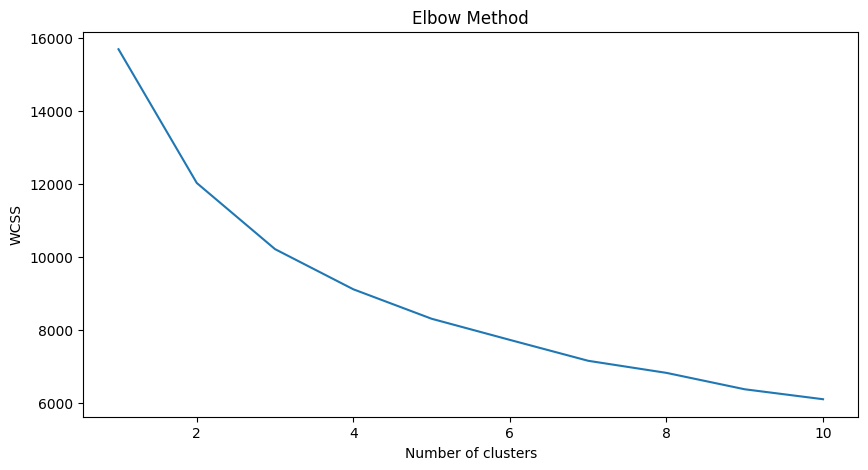

In [7]:
#plotting the elbow graph
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
#from the elbow graph, choose the optimal number of clusters
optimal_clusters = 10
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [9]:
#Adding the cluster information to the original data
data['Cluster'] = clusters

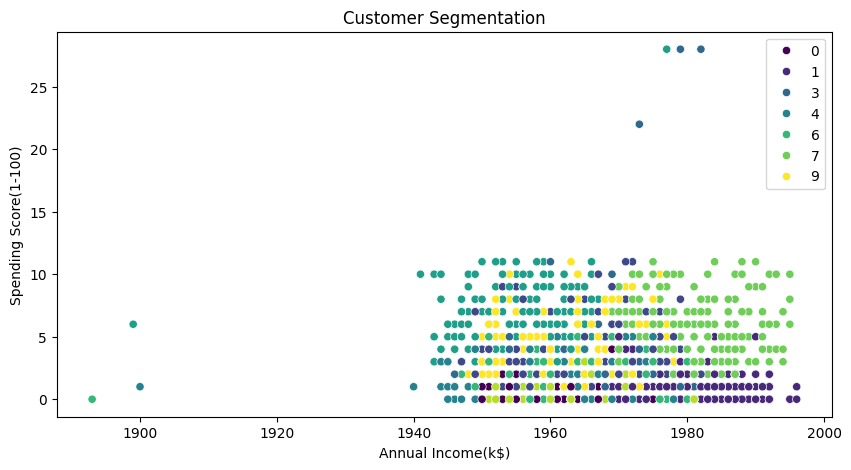

In [10]:
#Visualizing the clusters
plt.figure(figsize=(10,5))
sns.scatterplot(x='Year_Birth',y='NumCatalogPurchases',hue='Cluster',data=data,palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()
